In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import copy
import os
import matplotlib.pyplot as plt
import time
from decimal import Decimal

#プロットの色
colors = ["b" , "r" , "g"]
#散布図の点
markers = ["o","+","*"]


In [2]:
##

#データを保存するメソッド
#今のところ二次元のデータにしか対応していない
#txtファイルの形式で保存
def save_data(path,X,Y,labels):
    data = []
    data.append(X)
    data.append(Y)
    np.savetxt(path + "data.txt",data, delimiter = " ")
    np.savetxt(path + "labels.txt",labels)

def save_raw_data(data,labels,data_name):
    path = 'data/'+ data_name +'/'
    np.savetxt(path + "data.txt",data)
    np.savetxt(path + "labels.txt",labels)

#ファイルからよみこんで配列で保存する．
#今は使っていない
def read_data(path):
    X = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            X = row 
    return X

#データをプロットするメソッド
#データの表示サイズを変更する場合はここで調整
#保存先フォルダの場所もここで変更
def plt_data(X,Y,labels,data_name):
    plt.xlim(np.min(X)-1,np.max(X)+1,1)
    plt.ylim(np.min(Y)-1,np.max(Y)+1,1)
    plt.savefig(os.path.join("./data/"+ data_name + "/") + data_name + ".png")
    save_data('data/'+ data_name +'/',X,Y,labels)



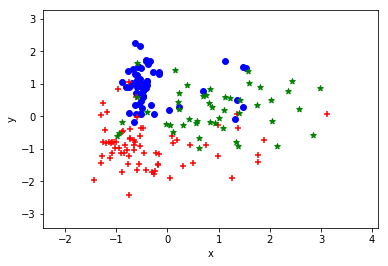

In [3]:
#ワインデータの生成

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_name = "wine_data"
#ワインデータセットの読み込み
wine = load_wine()
#print(wine.DESCR)
# 各特徴量のスケールを合わせておく
scaler = StandardScaler()
data = scaler.fit_transform(wine.data)
labels = wine.target
save_raw_data(data,labels,data_name)

X = data[:,1]
Y = data[:,0]
for i in range(3):
    for k in range(len(labels)):
        if labels[k] == i:
            plt.scatter(X[k],Y[k],marker=markers[i],s=35,c=colors[i])

#plt.figure(figsize=(5,5))
plt.xlim(np.min(X)-1,np.max(X)+1,1)
plt.ylim(np.min(Y)-1,np.max(Y)+1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig(os.path.join("./data/"+ data_name + "/") + data_name + ".png")

(150, 4)


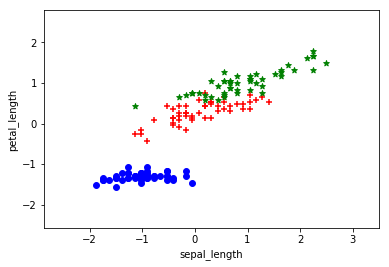

In [4]:
#IRISデータの生成
from sklearn.datasets import load_iris
data_name = "iris_data"
# Irisデータセットを読み込む
iris = load_iris()
#data = iris.data
scaler = StandardScaler()
data = scaler.fit_transform(iris.data)
labels = iris.target
print(data.shape)
save_raw_data(data,labels,data_name)

X = data[:,0]
Y = data[:,2]
plt.xlim(np.min(X)-1,np.max(X)+1,1)
plt.ylim(np.min(Y)-1,np.max(Y)+1,1)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
for i in range(3):
    for k in range(len(labels)):
        if labels[k] == i:
            plt.scatter(X[k],Y[k],marker=markers[i],s=35,c=colors[i])
plt.xlim(np.min(X)-1,np.max(X)+1,1)
plt.ylim(np.min(Y)-1,np.max(Y)+1,1)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.savefig(os.path.join("./data/"+ data_name + "/") + data_name + ".png")

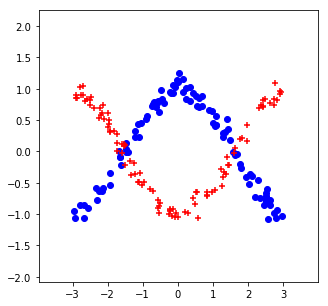

In [5]:
#data1の生成
np.random.seed(50)
data_name = "data1"

def sin(x):
    return np.sin(x + 1.5)

def cos(x):
    return np.cos(x + 3.1)

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(100)]
X2 = [np.random.uniform(-3,3) for i in range(100)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1 * np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1 * np.random.randn())
label2 = [1] * len(X2)

sumX = np.array(X1 + X2)
sumY = np.array(Y1 + Y2)
labels = np.array(label1 + label2)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt_data(sumX,sumY,labels,data_name)

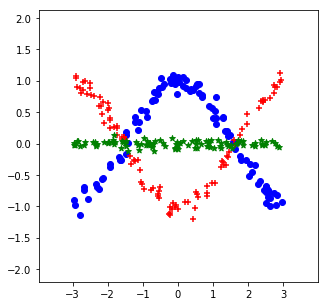

In [10]:
#data2の生成
np.random.seed(50)
data_name = "data2"

#上側の直線
def sin(x):
    return np.sin(x + 1.5)
#下側の直線
def cos(x):
    return np.cos(x + 3.1)

def func(x):
    return 0

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(100)]
X2 = [np.random.uniform(-3,3) for i in range(100)]
X3 = [np.random.uniform(-3,3) for i in range(100)]

Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

Y3 = []
for i in X3:
    Y3.append(func(i)+ 0.05*np.random.randn())
label3 = [2] * len(X3)
sumX = np.array( X1 + X2 + X3)
sumY = np.array( Y1 + Y2 + Y3)
labels = np.array(label1 + label2 + label3)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt.scatter(X3,Y3,marker=markers[2],c=colors[2])
plt_data(sumX,sumY,labels,data_name)

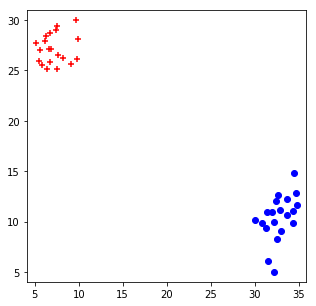

In [11]:
#data3の生成
data_name = "data3"
X1 = [np.random.uniform(30,35) for i in range(20)]
Y1 = [np.random.uniform(5,15) for i in range(20)]
label1 = [0] * len(X1)

X2 = [np.random.uniform(5,10) for i in range(20)]
Y2 = [np.random.uniform(25,30) for i in range(20)]
label2 = [1] * len(X2)

sumX = np.array( X1 + X2 )
sumY = np.array( Y1 + Y2 )
labels = np.array(label1 + label2)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data4の生成
np.random.seed(50)
data_name = "data4"

#上側の直線
def sin(x):
    return -1/4 * x + 3
#下側の直線
def cos(x):
    return 5

#0~10の範囲でxの点を100個のランダム生成
#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(30)]
X2 = [np.random.uniform(-3,3) for i in range(30)]

Y1 = []
for i in X1:
    Y1.append(sin(i) + 2.5*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 1.5*np.random.randn())
label2 = [1] * len(X2)


sumX = np.array( X1 + X2 )
sumY = np.array( Y1 + Y2 )
labels = np.array(label1 + label2)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data5の生成
np.random.seed(50)
data_name = "data5"
#上側の直線
def y1(x):
    return 1/4 * x + 30
#下側の直線
def y2(x):
    return 5 + 18
def y3(x):
    return 2/5* x
#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(5,35) for i in range(30)]
X2 = [np.random.uniform(5,35) for i in range(30)]
X3 = [np.random.uniform(5,35) for i in range(30)]

Y1 = []
for i in X1:
    Y1.append(y1(i) + 1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(y2(i) + 1*np.random.randn())
label2 = [1] * len(X2)

Y3 = []
for i in X3:
    Y3.append(y3(i) + 1*np.random.randn())
label3 = [2] * len(X3)


sumX = np.array( X1 + X2 )
sumY = np.array( Y1 + Y2 )
labels = np.array(label1 + label2)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data6の生成
np.random.seed(50)
data_name = "data6"
def y1(x):
    return 1/2 * x -2
def y2(x):
    return 1/3 * x 
def y3(x):
    return 1/8* x + 2

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(100)]
X2 = [np.random.uniform(-3,3) for i in range(100)]
X3 = [np.random.uniform(-3,3) for i in range(100)]

Y1 = []
for i in X1:
    Y1.append(y1(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(y2(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

Y3 = []
for i in X3:
    Y3.append(y3(i) + 0.1*np.random.randn())
label3 = [2] * len(X3)

data6_sumX = np.array( X1 + X2 + X3)
data6_sumY = np.array( Y1 + Y2 + Y3)
data6_labels = label1 + label2 + label3
data6_labels = np.array(data6_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "r" , "g"]
markers = ["o","+","x"]
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt.scatter(X3 , Y3,marker=markers[2],c=colors[2])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(np.min(data6_sumX)-1,np.max(data6_sumX)+1,1)
plt.ylim(np.min(data6_sumY)-1,np.max(data6_sumY)+1,1)
plt.savefig(os.path.join("./data/data6/") + "data6.png")

save_data('data/data6/',data6_sumX,data6_sumY,data6_labels)

In [ ]:
#data7の生成
data_name = "data7"
np.random.seed(50)

#上側の直線
def y1(x):
    return -1/12

#下側の直線
def y2(x):
    return 1


#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(30)]
X2 = [np.random.uniform(-3,3) for i in range(30)]

Y1 = []
for i in X1:
    Y1.append(y1(i) + 0.01*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(y2(i) + 0.01*np.random.randn())
label2 = [1] * len(X2)


data7_sumX = np.array( X1 + X2 )
data7_sumY = np.array( Y1 + Y2 )
data7_labels = label1 + label2 

data7_labels = np.array(data7_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "g" , "r"]
markers = ["+","*","o"]
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(np.min(data7_sumX)-0.1,np.max(data7_sumX)+0.1,1)
plt.ylim(np.min(data7_sumY)-0.1,np.max(data7_sumY)+0.1,1)
plt.savefig(os.path.join("./data/data7/") + "data7.png")

save_data('data/data7/',data7_sumX,data7_sumY,data7_labels)

In [ ]:
data = np.loadtxt('data/GDP/GDP.txt')
GDP_X = data[:,0]
GDP_Y = data[:,1]

plt.figure(figsize=(5, 5))
c = ["b" , "r" , "g"]
plt.scatter(GDP_X , GDP_Y , marker='+', s=35, edgecolor='k',c = "r")

plt.xlim(np.min(GDP_X)-5,np.max(GDP_X)+5,2)
plt.ylim(np.min(GDP_Y)-5,np.max(GDP_Y)+5,5)
save_data_no_label('data/GDP/',GDP_X,GDP_Y)

In [ ]:
#data9の生成
np.random.seed(50)
data_name = "data9"

#上側の直線
def sin(x):
    return -1/8 * x + 2
#下側の直線
def cos(x):
    return -1/6

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(100)]
X2 = [np.random.uniform(-3,3) for i in range(20)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.3*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.3*np.random.randn())
label2 = [1] * len(X2)

data9_sumX = np.array( X1 + X2 )
data9_sumY = np.array( Y1 + Y2 )
data9_labels = label1 + label2

#sumX = sumX.reshape(len(sumX),1)
#sumY = sumY.reshape(len(sumY),1)
data9_labels = np.array(data9_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "r" , "g"]
markers = ["o","+","a"]

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt.xlim(np.min(data9_sumX)-1,np.max(data9_sumX)+1,1)
plt.ylim(np.min(data9_sumY)-1,np.max(data9_sumY)+1,1)
plt.xlabel("x")
plt.ylabel("y")

plt.savefig(os.path.join("./data/data9/") + "data9.png")

save_data('data/data9/',data9_sumX,data9_sumY,data9_labels)

In [ ]:
#data10の生成
np.random.seed(50)
data_name = "data10"
#上側の直線
def sin(x):
    return np.sin(x+1.5)
#下側の直線
def cos(x):
    return -2

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(50)]
X2 = [np.random.uniform(-3,3) for i in range(50)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

data10_sumX = np.array( X1 + X2 )
data10_sumY = np.array( Y1 + Y2 )
data10_labels = label1 + label2

#sumX = sumX.reshape(len(sumX),1)
#sumY = sumY.reshape(len(sumY),1)
data10_labels = np.array(data10_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "r" , "g"]
markers = ["o","+","a"]

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt.xlim(np.min(data10_sumX)-1,np.max(data10_sumX)+1,1)
plt.ylim(np.min(data10_sumY)-1,np.max(data10_sumY)+1,1)
plt.xlabel("x")
plt.ylabel("y")

                        

plt.savefig(os.path.join("./data/data10/") + "data10.png")

save_data('data/data10/',data10_sumX,data10_sumY,data10_labels)

In [ ]:
#data11の生成
np.random.seed(50)
data_name = "data11"

#上側の直線
def sin(x):
    return np.sin(x+1.2)
#下側の直線
def cos(x):
    return -1

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-2,2) for i in range(50)]
X2 = [np.random.uniform(-1,1) for i in range(20)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

data11_sumX = np.array( X1 + X2 )
data11_sumY = np.array( Y1 + Y2 )
data11_labels = label1 + label2

#sumX = sumX.reshape(len(sumX),1)
#sumY = sumY.reshape(len(sumY),1)
data11_labels = np.array(data11_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "r" , "g"]
markers = ["o","+","a"]

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt.xlim(np.min(data11_sumX)-1,np.max(data11_sumX)+1,1)
plt.ylim(np.min(data11_sumY)-1,np.max(data11_sumY)+1,1)
                                 

plt.savefig(os.path.join("./data/data11/") + "data11.png")

save_data('data/data11/',data11_sumX,data11_sumY,data11_labels)

In [ ]:
#data12の生成
np.random.seed(50)
data_name = "data12"

#上側の直線
def sin(x):
    return -1/8 * x + 2
#下側の直線
def cos(x):
    return -1/6

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(75)]
X2 = [np.random.uniform(-3,3) for i in range(75)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.3*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.3*np.random.randn())
label2 = [1] * len(X2)

data12_sumX = np.array( X1 + X2 )
data12_sumY = np.array( Y1 + Y2 )
data12_labels = label1 + label2

#sumX = sumX.reshape(len(sumX),1)
#sumY = sumY.reshape(len(sumY),1)
data12_labels = np.array(data12_labels)

plt.figure(figsize=(5, 5))
colors = ["b" , "r" , "g"]
markers = ["o","+","a"]

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt.xlim(np.min(data12_sumX)-1,np.max(data12_sumX)+1,1)
plt.ylim(np.min(data12_sumY)-1,np.max(data12_sumY)+1,1)
plt.xlabel("x")
plt.ylabel("y")

plt.savefig(os.path.join("./data/data12/") + "data12.png")

save_data('data/data12/',data12_sumX,data12_sumY,data12_labels)

In [ ]:
#data13の生成
np.random.seed(50)
data_name = "data13"

def sin(x):
    return np.sin(x + 2) + 0.5

def cos(x):
    return np.cos(x + 2) -0.5

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,2) for i in range(50)]
X2 = [np.random.uniform(-1,3) for i in range(50)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

sumX = np.array( X1 + X2 )
sumY = np.array( Y1 + Y2 )
labels = np.array(label1 + label2)

plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])

plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data13の生成
np.random.seed(50)
data_name = "data14"

def sin(x):
    return np.sin(x + 2) + 0.5

def cos(x):
    return np.cos(x + 2) -0.5

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,2) for i in range(50)]
X2 = [np.random.uniform(-1,3) for i in range(50)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

# Y2 = []
# for i in X2:
#     Y2.append(cos(i) + 0.1*np.random.randn())
# label2 = [1] * len(X2)

sumX = np.array( X1 )
sumY = np.array( Y1 )
labels = np.array(label1 )

colors = ["b" , "r" , "g"]
markers = ["o","+","a"]


plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])

plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data15の生成
np.random.seed(50)
data_name = "data15"

def sin(x):
    return np.sin(x + 2) + 0.5

def cos(x):
    return np.cos(x + 2) -0.5

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,2) for i in range(100)]
X2 = [np.random.uniform(-1,3) for i in range(100)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1*np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1*np.random.randn())
label2 = [1] * len(X2)

sumX = np.array(X1 + X2)
sumY = np.array(Y1 + Y2)
labels = np.array(label1 + label2)

colors = ["b" , "r" , "g"]
markers = ["o","+","a"]


plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data16の生成
np.random.seed(50)
data_name = "data16"

def sin(x):
    return 1/4*x + 3

def cos(x):
    return 0.5

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(30)]
X2 = [np.random.uniform(-3,3) for i in range(30)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.5 * np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.5 * np.random.randn())
label2 = [1] * len(X2)

sumX = np.array(X1 + X2)
sumY = np.array(Y1 + Y2)
labels = np.array(label1 + label2)

colors = ["b" , "r" , "g"]
markers = ["o","+","a"]


plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt_data(sumX,sumY,labels,data_name)

In [ ]:
#data17の生成
np.random.seed(50)
data_name = "data17"

def sin(x):
    return 1/4*x + 3

def cos(x):
    return 0.5

#0~10の範囲でxの点を100個のランダム生成
X1 = [np.random.uniform(-3,3) for i in range(15)]
X2 = [np.random.uniform(-3,3) for i in range(15)]


Y1 = []
for i in X1:
    Y1.append(sin(i) + 0.1 * np.random.randn())
label1 = [0] * len(X1)

Y2 = []
for i in X2:
    Y2.append(cos(i) + 0.1 * np.random.randn())
label2 = [1] * len(X2)

sumX = np.array(X1 + X2)
sumY = np.array(Y1 + Y2)
labels = np.array(label1 + label2)

colors = ["b" , "r" , "g"]
markers = ["o","+","a"]


plt.figure(figsize=(5,5))
plt.scatter(X1 , Y1,marker=markers[0],c=colors[0])
plt.scatter(X2 , Y2,marker=markers[1],c=colors[1])
plt_data(sumX,sumY,labels,data_name)